In [27]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patch

In [28]:
#import clean data
cars=pd.read_csv('FinalCarData.csv')

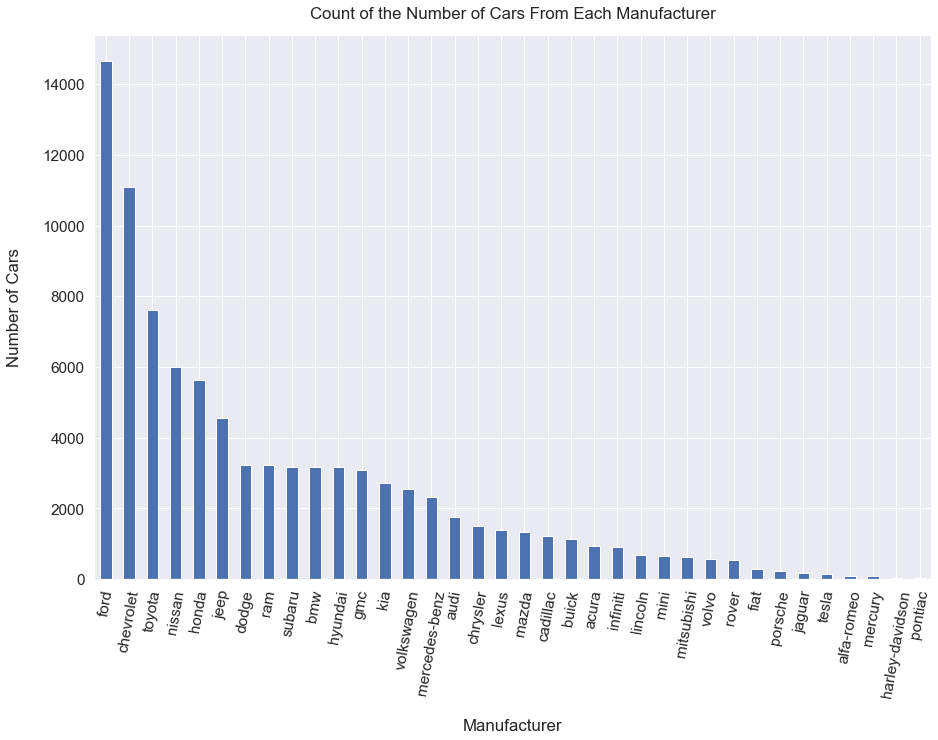

In [30]:
cars['manufacturer'].value_counts().plot(kind='bar')

sns.set(font_scale=1.4)
cars['manufacturer'].value_counts().plot(kind='bar', figsize=(15, 10), rot=80)
plt.xlabel("Manufacturer", labelpad=20)
plt.ylabel("Number of Cars", labelpad=20)
plt.title("Count of the Number of Cars From Each Manufacturer", y=1.02);

> Turn the text values into numbers for each column and create a table lookup table for number to text value

In [4]:

cat_columns = ['manufacturer', 'model', 'fuel', 'transmission', 'type', 'paint_color']

cars_enc_lkup_df = pd.DataFrame()

col_legend_dict = {}

cars_learn = {}

for col in cat_columns:
    
    col_legend_dict.clear()
    if col in cars.columns:           
        cars_learn[col] = LabelEncoder()
        cars_learn[col].fit(list(cars[col].astype(str).values))        
        cars[col] = cars_learn[col].transform(list(cars[col].astype(str).values))        
    
    nums = np.unique(list(cars[col].astype(int).values))    
    values = cars_learn[col].inverse_transform(nums)
    keys = range(len(nums))
    for i in keys:
        col_legend_dict[i] = values[i]    
    cars_enc_lkup_df = cars_enc_lkup_df.append(col_legend_dict, ignore_index=True)

cars_enc_lkup_df = cars_enc_lkup_df.swapaxes("index", "columns")

cars_enc_lkup_df.columns = cat_columns


In [6]:
#lookup table used in the application. This will be loaded by the application as a dataframe
cars_enc_lkup_df.to_csv('EncodedCarsLookupTable_df.csv', index=False)

In [7]:
y = cars['price']
X = cars.drop(columns='price')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Training the model

rfr = RandomForestRegressor(n_estimators = 25, random_state = 42)
print('Parameters currently in use:\n')
print(rfr.get_params())
print('Training...')
model = rfr.fit(X_train, y_train)

In [ ]:
# Create joblib model for the web application

from joblib import dump,load

dump(model, 'model.joblib')

In [17]:
y_pred = model.predict(X_test)

In [13]:
# Get a car to test the prediction

test = pd.DataFrame({'Test':X_test.iloc[300]})
test = test.swapaxes("index", "columns")
test

,manufacturer,model,fuel,odometer,transmission,type,paint_color,age
Test,13.0,73.0,2.0,118472.0,0.0,10.0,10.0,6.0


In [14]:
# test the predition model
single_car_test = model.predict(test)

In [15]:
#prediction model results
single_car_test

array([14703.16])

In [18]:
# Actual values vs Predicted values sample
cars_test = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
cars_test

,Actual,Predicted
86879,37990,33692.36
35298,8997,11986.24
48455,10000,8193.28
89965,18617,18501.16
56333,23695,31613.28
...,...,...
23800,6895,7731.96
54027,13995,13222.20
87962,20999,23839.20
74938,15599,29238.08


In [19]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)

('Mean Absolute Error:', 3229.166065214385)

In [20]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)

('Mean Squared Error:', 24296453.40991023)

In [21]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

('Root Mean Squared Error:', 4929.143273420872)

MAPE

In [22]:
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

In [23]:
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 75.36 %.


In [24]:
'Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.'

('Mean Absolute Error:', 3229.17, 'dollars.')

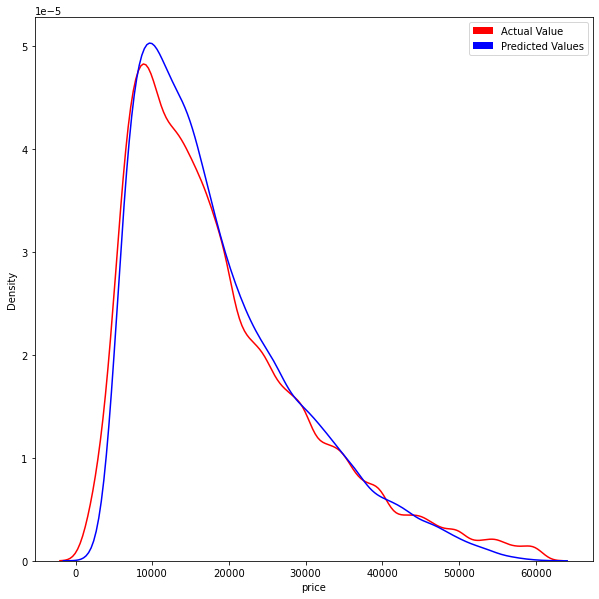

In [31]:

fig_dims = (10, 10)

fig, ax = plt.subplots(figsize=fig_dims)

sns.kdeplot(y, color="r", ax = ax)
sns.kdeplot(y_pred, color="b", ax=ax)

handles = [patch.Patch(facecolor="r", label="Actual Value"),
           patch.Patch(facecolor="b", label="Predicted Values")]
plt.legend(handles=handles)


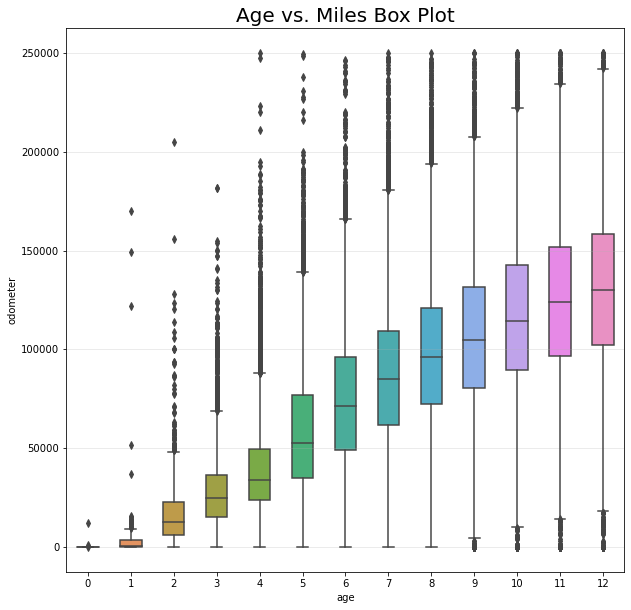

In [29]:
fig_dims = (10, 10)

fig, ax = plt.subplots(figsize=fig_dims)
ax.grid(True, alpha=0.3)

ax.set_title('Age vs. Miles Box Plot', size=20)


pblot = sns.boxplot(y='odometer', x='age', data=cars, width=0.5, ax=ax)


plt.show()

<AxesSubplot:title={'center':'Price Distribution'}, xlabel='price', ylabel='Count'>

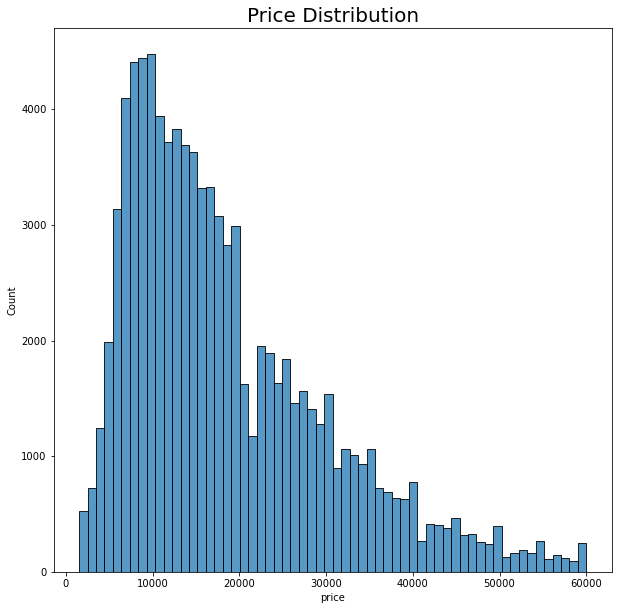

In [30]:
fig_dims = (10, 10)

fig, ax = plt.subplots(figsize=fig_dims)

# sns.kdeplot(y, color="r", ax = ax)
# sns.kdeplot(y_pred, color="b", ax=ax)
ax.set_title('Price Distribution', size=20)


sns.histplot(cars['price'], bins= 60, ax=ax)